This notebook reproduces the examples shown in our CAV'22 paper, as well as a few more.  It was part of the CAV'22 artifact, but has been updated to keep up with recent version of Spot.

In [1]:
import spot
from spot.jupyter import display_inline
from buddy import bdd_ithvar
spot.setup()

# Figure 1

Fig. 1 of the paper shows (1) how to convert an LTL formula to an automaton with arbitrary acceptance condition, and (2) how to display the internal representation of the automaton.

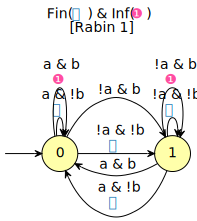

In [2]:
aut = spot.translate('GF(a <-> Xa) & FGb', 'det', 'gen')
aut

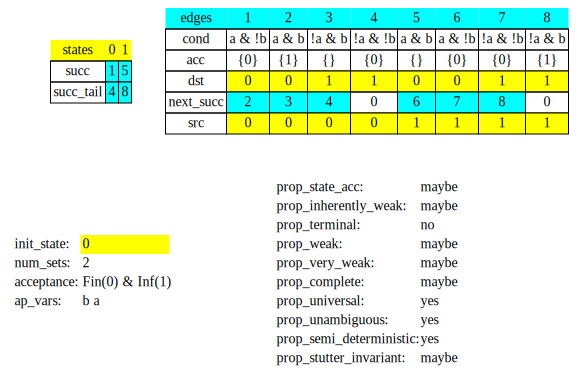

In [3]:
aut.show_storage()

# Figure 2

Fig.2 shows an example of alternating automaton, represented in two different ways, along with its internal representation.

In [4]:
# We enter the automaton using the HOA format.
aut2 = spot.automaton("""
HOA: v1
States: 5
Start: 3
acc-name: co-Buchi
Acceptance: 1 Fin(0)
AP: 2 "a" "b"
--BODY--
State: 0 {0} 
[0] 1
[!0] 2
State: 1 {0} 
[0&1] 0&1
State: 2 
[t] 2 
State: 3 
[0] 4&0
State: 4 
[t] 3 
--END--
""")

In [5]:
display_inline(aut2, aut2.show('.u'), per_row=2)

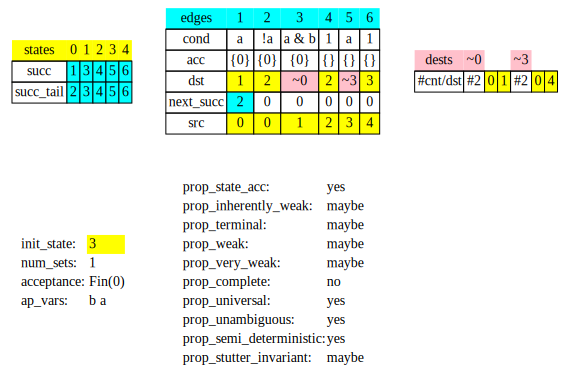

In [6]:
aut2.show_storage()

# Figure 3

Fig. 3 shows an example of game generated by `ltlsynt` from the LTL specification of a reactive controller, and then how this game can be encoded into an And-Inverter-Graph.
First we retrieve the game generated by `ltlsynt` (any argument passed to `spot.automaton` is interpreted as a command if it ends with a pipe), then we solve it to compute a possible winning strategy.  

Player 0 plays from round states and tries to violate the acceptance condition; Player 1 plays from diamond states and tries to satisfy the acceptance condition.  Once a game has been solved, the `highlight_strategy` function will decorate the automaton with winning region and computed strategies for player 0 and 1 in red and green respectively.  Therefore this game is winning for player 1 from the initial state.

Compared to the paper, the production of parity automata in `ltlsynt` has been improved, and it generates a Büchi game instead (but Büchi can be seen one case of parity).

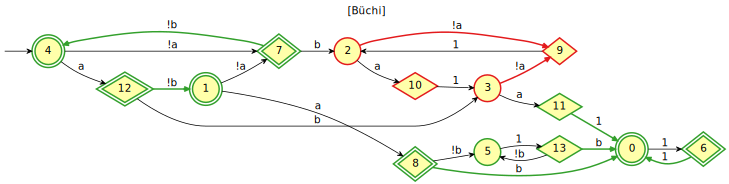

In [7]:
game = spot.automaton("ltlsynt --outs=b -f 'F(a & Xa) <-> Fb' --print-game-hoa |")
spot.solve_game(game)
spot.highlight_strategy(game)
game

The `solved_game_to_mealy()` shown in the paper does not always produce the same type of output, so it is
better to explicitely call `solved_game_to_split_mealy()` or `solved_game_to_separated_mealy()` depending on the type of output one need.  We also show how to use the `reduce_mealy()` method to simplify one.

In [8]:
mealy = spot.solved_game_to_separated_mealy(game)
mealy_min = spot.reduce_mealy(mealy, True)
aig = spot.mealy_machine_to_aig(mealy_min, "isop")
display_inline(mealy, mealy_min, aig)